In [1]:
import psycopg2
import pandas as pd
from dotenv import load_dotenv
import os

load_dotenv("db_credentials.env")

conn = psycopg2.connect(
    user=os.getenv("DB_USER"),
    password=os.getenv("DB_PASSWORD"),
    host=os.getenv("DB_HOST"),
    port=os.getenv("DB_PORT"),
    dbname=os.getenv("DB_NAME")
)

df = pd.read_sql_query("SELECT * FROM electricity_meter;", conn)
conn.close()

df

/var/folders/39/mwlmj6614j1ck_p4g29fw8zc0000gn/T/ipykernel_17798/1850329838.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query("SELECT * FROM electricity_meter;", conn)


,id,created_at,active_tariff,active_power_w,total_power_import_kwh,total_gas_m3
0,1,2025-04-11 11:30:24.164061+00:00,1,196,NaN,NaN
1,2,2025-04-11 11:31:33.349774+00:00,1,103,NaN,NaN
2,3,2025-04-11 11:32:55.929347+00:00,1,99,NaN,NaN
3,4,2025-04-11 11:40:54.900280+00:00,1,103,NaN,NaN
4,5,2025-04-11 12:59:15.113278+00:00,1,111,NaN,NaN
...,...,...,...,...,...,...
37198,37199,2025-08-25 02:47:39.029438+00:00,2,124,4654.254,1262.724
37199,37200,2025-08-25 02:52:39.354941+00:00,2,123,4654.265,1262.724
37200,37201,2025-08-25 02:57:39.060469+00:00,2,63,4654.274,1262.724
37201,37202,2025-08-25 03:02:39.046906+00:00,2,60,4654.279,1262.724


In [2]:
import pytz

# Step 1: Make sure it's timezone-aware
df["created_at"] = pd.to_datetime(df["created_at"], utc=True)

# Step 2: Convert to Belgium time (automatic handling of daylight saving)
belgium_tz = pytz.timezone("Europe/Brussels")
df["created_at_be"] = df["created_at"].dt.tz_convert(belgium_tz)

df

,id,created_at,active_tariff,active_power_w,total_power_import_kwh,total_gas_m3,created_at_be
0,1,2025-04-11 11:30:24.164061+00:00,1,196,NaN,NaN,2025-04-11 13:30:24.164061+02:00
1,2,2025-04-11 11:31:33.349774+00:00,1,103,NaN,NaN,2025-04-11 13:31:33.349774+02:00
2,3,2025-04-11 11:32:55.929347+00:00,1,99,NaN,NaN,2025-04-11 13:32:55.929347+02:00
3,4,2025-04-11 11:40:54.900280+00:00,1,103,NaN,NaN,2025-04-11 13:40:54.900280+02:00
4,5,2025-04-11 12:59:15.113278+00:00,1,111,NaN,NaN,2025-04-11 14:59:15.113278+02:00
...,...,...,...,...,...,...,...
37198,37199,2025-08-25 02:47:39.029438+00:00,2,124,4654.254,1262.724,2025-08-25 04:47:39.029438+02:00
37199,37200,2025-08-25 02:52:39.354941+00:00,2,123,4654.265,1262.724,2025-08-25 04:52:39.354941+02:00
37200,37201,2025-08-25 02:57:39.060469+00:00,2,63,4654.274,1262.724,2025-08-25 04:57:39.060469+02:00
37201,37202,2025-08-25 03:02:39.046906+00:00,2,60,4654.279,1262.724,2025-08-25 05:02:39.046906+02:00


In [3]:
df["date_be"] = df["created_at_be"].dt.date
df["time_be"] = df["created_at_be"].dt.time
df["hour_be"] = df["created_at_be"].dt.hour
df["minute_be"] = df["created_at_be"].dt.minute
df["day_of_week"] = df["created_at_be"].dt.day_name()  # e.g., "Monday"
df["day_of_month"] = df["created_at_be"].dt.day
df["month"] = df["created_at_be"].dt.month
df["month_name"] = df["created_at_be"].dt.month_name()
df["year"] = df["created_at_be"].dt.year
df["week_number"] = df["created_at_be"].dt.isocalendar().week  # ISO week n
df.drop(columns=["id"], inplace=True)
df

,created_at,active_tariff,active_power_w,total_power_import_kwh,total_gas_m3,created_at_be,date_be,time_be,hour_be,minute_be,day_of_week,day_of_month,month,month_name,year,week_number
0,2025-04-11 11:30:24.164061+00:00,1,196,NaN,NaN,2025-04-11 13:30:24.164061+02:00,2025-04-11,13:30:24.164061,13,30,Friday,11,4,April,2025,15
1,2025-04-11 11:31:33.349774+00:00,1,103,NaN,NaN,2025-04-11 13:31:33.349774+02:00,2025-04-11,13:31:33.349774,13,31,Friday,11,4,April,2025,15
2,2025-04-11 11:32:55.929347+00:00,1,99,NaN,NaN,2025-04-11 13:32:55.929347+02:00,2025-04-11,13:32:55.929347,13,32,Friday,11,4,April,2025,15
3,2025-04-11 11:40:54.900280+00:00,1,103,NaN,NaN,2025-04-11 13:40:54.900280+02:00,2025-04-11,13:40:54.900280,13,40,Friday,11,4,April,2025,15
4,2025-04-11 12:59:15.113278+00:00,1,111,NaN,NaN,2025-04-11 14:59:15.113278+02:00,2025-04-11,14:59:15.113278,14,59,Friday,11,4,April,2025,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37198,2025-08-25 02:47:39.029438+00:00,2,124,4654.254,1262.724,2025-08-25 04:47:39.029438+02:00,2025-08-25,04:47:39.029438,4,47,Monday,25,8,August,2025,35
37199,2025-08-25 02:52:39.354941+00:00,2,123,4654.265,1262.724,2025-08-25 04:52:39.354941+02:00,2025-08-25,04:52:39.354941,4,52,Monday,25,8,August,2025,35
37200,2025-08-25 02:57:39.060469+00:00,2,63,4654.274,1262.724,2025-08-25 04:57:39.060469+02:00,2025-08-25,04:57:39.060469,4,57,Monday,25,8,August,2025,35
37201,2025-08-25 03:02:39.046906+00:00,2,60,4654.279,1262.724,2025-08-25 05:02:39.046906+02:00,2025-08-25,05:02:39.046906,5,2,Monday,25,8,August,2025,35


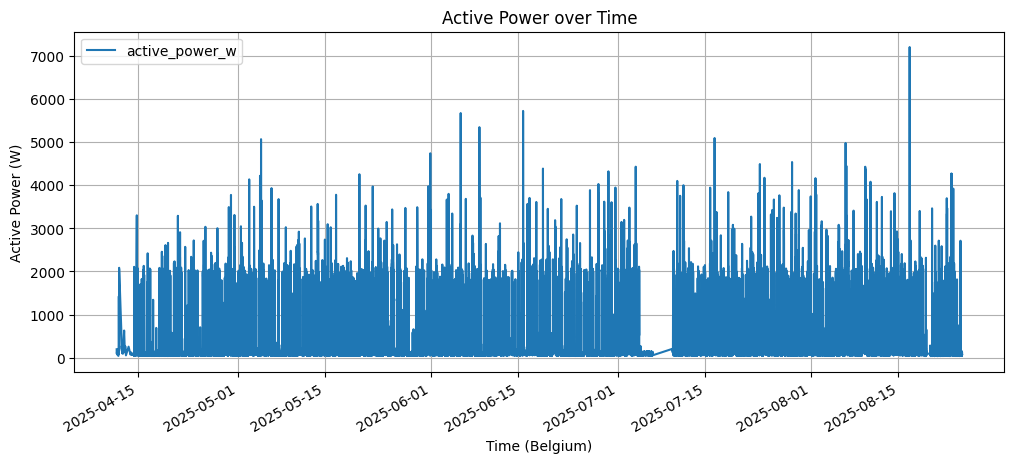

In [4]:
import matplotlib.pyplot as plt

# Optional: sort by time
df_sorted = df.sort_values("created_at_be")

# Plot
df_sorted.plot(
    x="created_at_be",
    y="active_power_w",
    kind="line",
    title="Active Power over Time",
    figsize=(12, 5)
)
plt.xlabel("Time (Belgium)")
plt.ylabel("Active Power (W)")
plt.grid(True)
#plt.tight_layout()
plt.show()

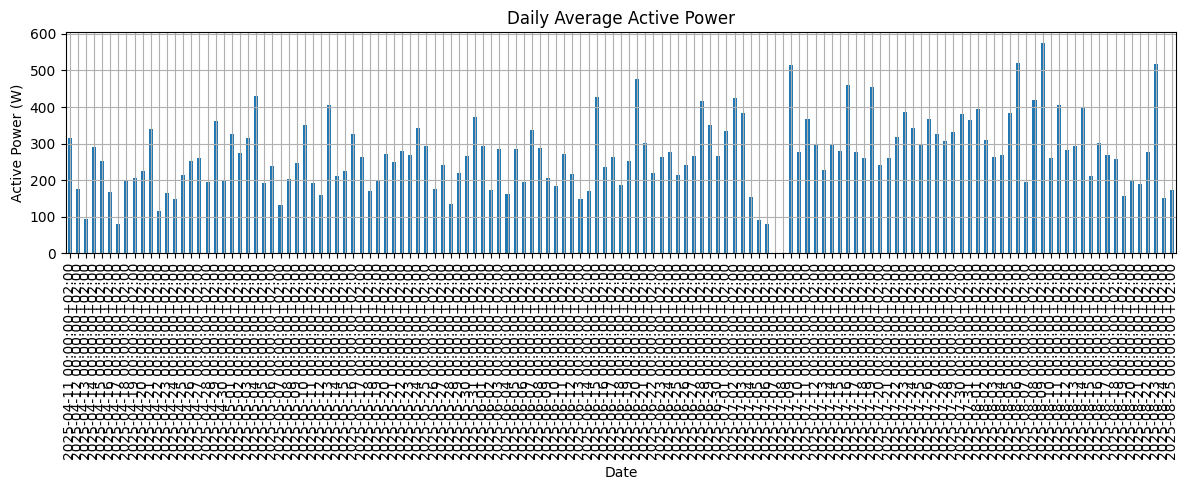

In [5]:
# Resample by day (or 'H' for hourly), and compute the mean power
df_daily = df_sorted.set_index("created_at_be").resample("D").mean(numeric_only=True)

# Plot as bar chart
df_daily.plot(
    y="active_power_w",
    kind="bar",
    title="Daily Average Active Power",
    figsize=(12, 5),
    legend=False
)
plt.xlabel("Date")
plt.ylabel("Active Power (W)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [6]:
df

,created_at,active_tariff,active_power_w,total_power_import_kwh,total_gas_m3,created_at_be,date_be,time_be,hour_be,minute_be,day_of_week,day_of_month,month,month_name,year,week_number
0,2025-04-11 11:30:24.164061+00:00,1,196,NaN,NaN,2025-04-11 13:30:24.164061+02:00,2025-04-11,13:30:24.164061,13,30,Friday,11,4,April,2025,15
1,2025-04-11 11:31:33.349774+00:00,1,103,NaN,NaN,2025-04-11 13:31:33.349774+02:00,2025-04-11,13:31:33.349774,13,31,Friday,11,4,April,2025,15
2,2025-04-11 11:32:55.929347+00:00,1,99,NaN,NaN,2025-04-11 13:32:55.929347+02:00,2025-04-11,13:32:55.929347,13,32,Friday,11,4,April,2025,15
3,2025-04-11 11:40:54.900280+00:00,1,103,NaN,NaN,2025-04-11 13:40:54.900280+02:00,2025-04-11,13:40:54.900280,13,40,Friday,11,4,April,2025,15
4,2025-04-11 12:59:15.113278+00:00,1,111,NaN,NaN,2025-04-11 14:59:15.113278+02:00,2025-04-11,14:59:15.113278,14,59,Friday,11,4,April,2025,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37198,2025-08-25 02:47:39.029438+00:00,2,124,4654.254,1262.724,2025-08-25 04:47:39.029438+02:00,2025-08-25,04:47:39.029438,4,47,Monday,25,8,August,2025,35
37199,2025-08-25 02:52:39.354941+00:00,2,123,4654.265,1262.724,2025-08-25 04:52:39.354941+02:00,2025-08-25,04:52:39.354941,4,52,Monday,25,8,August,2025,35
37200,2025-08-25 02:57:39.060469+00:00,2,63,4654.274,1262.724,2025-08-25 04:57:39.060469+02:00,2025-08-25,04:57:39.060469,4,57,Monday,25,8,August,2025,35
37201,2025-08-25 03:02:39.046906+00:00,2,60,4654.279,1262.724,2025-08-25 05:02:39.046906+02:00,2025-08-25,05:02:39.046906,5,2,Monday,25,8,August,2025,35


Text(0, 0.5, 'Average Active Power (W)')

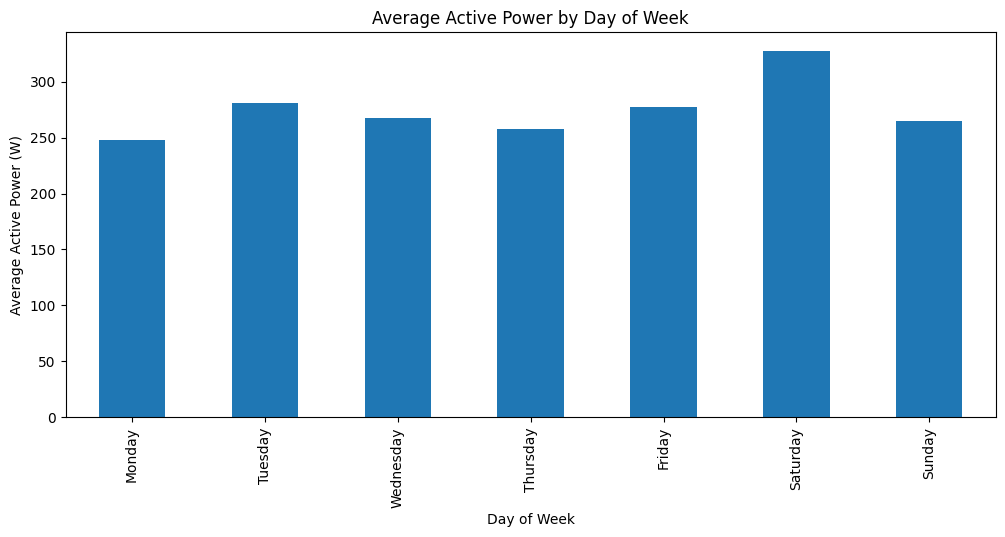

In [7]:
# Group by day_of_week and compute the average active_power_w
df_weekly_avg = df.groupby("day_of_week")["active_power_w"].mean().reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
df_weekly_avg.plot(
    kind="bar",
    title="Average Active Power by Day of Week",
    figsize=(12, 5),
    legend=False
)
plt.xlabel("Day of Week")
plt.ylabel("Average Active Power (W)")

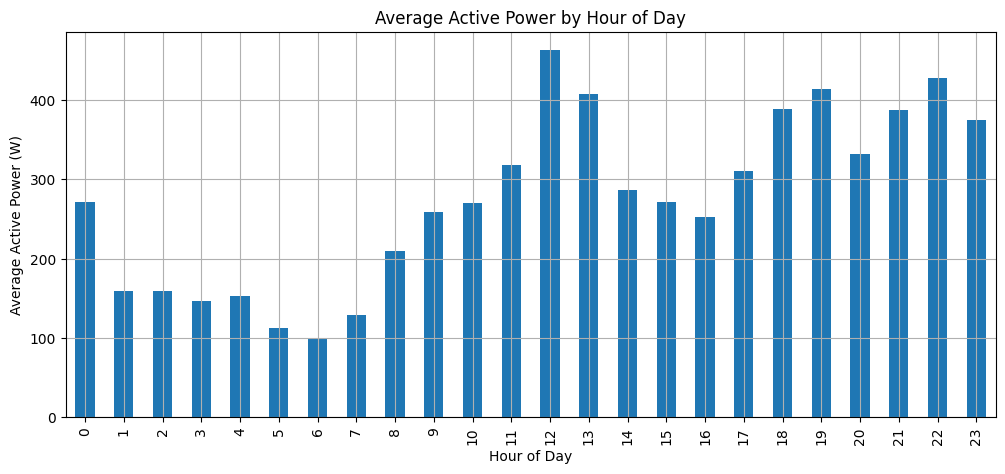

In [8]:
# Group by hour_be and compute the average active_power_w
df_hourly_avg = df.groupby("hour_be")["active_power_w"].mean()
df_hourly_avg.plot(
    kind="bar",
    title="Average Active Power by Hour of Day",
    figsize=(12, 5),
    legend=False
)
plt.xlabel("Hour of Day")
plt.ylabel("Average Active Power (W)")
plt.grid(True)

In [9]:
#convert to CSV
df.to_csv("electricity_meter_data.csv", index=False)

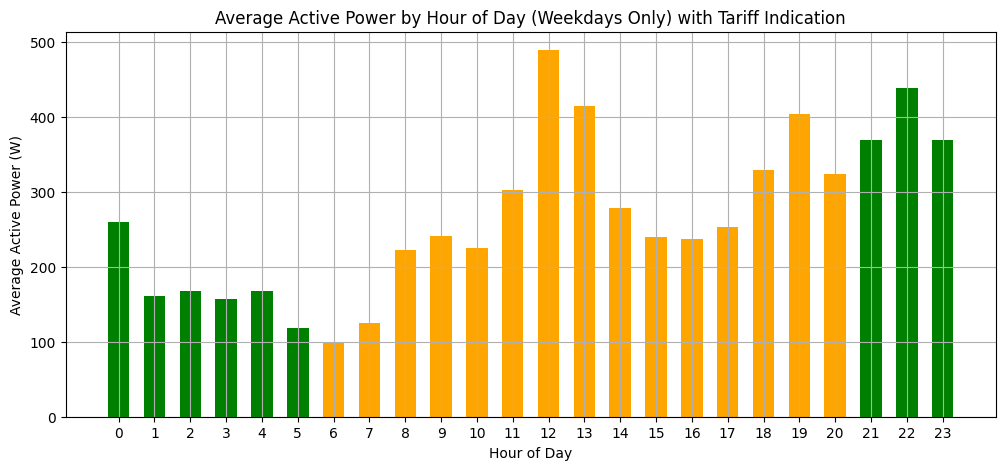

In [10]:
# To split weekdays and weekends
df_weekdays = df[df["day_of_week"].isin(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"])]
df_weekends = df[df["day_of_week"].isin(["Saturday", "Sunday"])]

# Group by hour_be and compute the average active_power_w
df_weekdays_hourly_avg = df_weekdays.groupby("hour_be")["active_power_w"].mean()
df_weekends_hourly_avg = df_weekends.groupby("hour_be")["active_power_w"].mean()

df_weekdays_hourly_avg_tariff = df_weekdays.groupby("hour_be")[["active_power_w", "active_tariff"]].mean()

colors = ["green" if tariff == 2 else "orange" for tariff in df_weekdays_hourly_avg_tariff["active_tariff"]]
plt.figure(figsize=(12, 5))
plt.bar(df_weekdays_hourly_avg_tariff.index, df_weekdays_hourly_avg_tariff["active_power_w"], color=colors, width=0.6)
plt.title("Average Active Power by Hour of Day (Weekdays Only) with Tariff Indication")
plt.xlabel("Hour of Day")
plt.ylabel("Average Active Power (W)")
plt.grid(True)
plt.xticks(range(0, 24))
plt.show()


**Final Observations and Insights**

After analyzing the electricity consumption data and visualizing the average active power by hour of the day (weekdays only), I have identified a few key takeaways:

1.	Tariff Timing Clarification
I initially assumed the low tariff started at 7:00 AM, but the data clearly shows that the expensive tariff actually starts at 6:00 AM, not 7:00. This was an important correction and highlights the value of data-driven analysis.
➤ Cheap tariff: from 21:00 to 06:00
➤ Full tariff: from 06:00 to 21:00

2.	Opportunities for Load Shifting
Shifting consumption away from the expensive hours will be challenging, especially during the peak between 12:00 and 14:00. However, there might be some room for optimization between 19:00 and 21:00, just before the cheap tariff kicks in. Small behavioral changes or smart scheduling could help reduce costs during this window.

3.	Weekend Tariffs
During weekends, the electricity tariff remains consistently low throughout the day, which simplifies the analysis — no need to optimize usage by hour for those days.


**Conclusion:**

This analysis provided valuable insights into my consumption habits and clarified important assumptions about my electricity pricing. Going forward, keeping the 21:00 switch to the cheap tariff in mind can help guide smarter energy decisions.